# Fatores adicionais na trajetória de um projétil

O estudo da trajetória de um projétil em um campo gravitacional uniforme é uma das primeiras atividades desenvolvidas em cursos de física. Entretanto, nas soluções normalmente apresentadas o modelo recebe diversas simplificações para permitir sua solução analítica.

Neste projeto, vamos incluir no modelo alguns fatores normalmente ignorados e verificar seus efeitos sobre a trajetória do projétil.

### O caso simples

Vamos começar com o caso simples em que o campo gravitacional é uniforme, o projétil é pontual e não há nenhum tipo de força externa ou dissipação de energia.

Consideramos um sistema positivo de coordenadas $(x, y, z)$ orientado de tal forma que o eixo $z$ está na vertical, com valores crescentes para cima, o plano $z=0$ coincide com o solo e o eixo de $x$ é orientado na direção horizontal do lançamento do projétil. O projétil é lançado inicialmente ($t=0$) da posição $(0, 0, h)$ com velocidade inicial $(v_{x,0}, 0, v_{z,0})$. Queremos então calcular a trajetória do projétil $(x(t), y(t), z(t))$ até que ele retorne para o solo.

Se o projétil tem massa $m=1$ e o campo gravitacional apresenta uma aceleração uniforme $-g$ na direção do eixo $z$, as equações de movimento são expressas de forma simple:

\begin{eqnarray}
\frac{d^2x}{dt^2} & = & 0\\
\frac{d^2y}{dt^2} & = & 0\\
\frac{d^2z}{dt^2} & = & -g
\end{eqnarray}

Como essas equações diferenciais são lineares, considerando as condições iniciais dadas, o cálculo da trajetória fica simples:

\begin{eqnarray}
x(t) & = & v_{x,0} t \\
y(t) & = & 0\\
z(t) & = & h + v_{z,0} t - \frac{1}{2} g t^2
\end{eqnarray}

Isto é: o projétil permanece no plano $y=0$, se desloca uniformemente na direção de $x$ crescente e é uniformemente acelerado em $z$. Essas equações são válidas até que o projétil atinja o solo. Isso ocorre quando $z=0$, e portanto podemos encontrar o maior valor de tempo de interesse $T$ resolvendo a equação:

$$ h + v_{z,0} T - \frac{1}{2} g T^2 = 0$$

que resulta na solução:

$$ T = \frac{v_{z,0}+\sqrt{v_{z,0}^2+2 h g}}{g}$$

Com essas informações, podemos plotar as componentes da trajetória. Primeiro importamos os módulos necessários e fazemos com que os gráficos fiquem embutidos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# Função que calcula uma trajetória para o caso simples acima.
# Recebe os parâmetros:
#   h (altura do lançamento)
#   v0 (vetor da velocidade inicial)
#   g (aceleração da gravidade)
#   nintervalos (número de intervalos de tempo até atingir o solo)
# Retorna:
#   um array com os instantes de tempo
#   um array 2D em que cada linha tem o vetor de posição em um dos instantes de tempo
def trajetoria_simples(h, v0, g, nintervalos):
    # Extrai as componentes de velocidade
    vx0, vy0, vz0 = v0
    
    # Intervalo de tempo a usar
    T = (vz0 + np.sqrt(vz0**2 + 2 * g * h))/g
    t = np.linspace(0, T, nintervalos + 1)
    
    # Trajetória
    trajetoria = np.zeros((t.size, 3))
    trajetoria[:, 0] = vx0 * t
    trajetoria[:, 1] = np.zeros_like(t)
    trajetoria[:, 2] = h + vz0 * t - 0.5 * g * t**2
    
    return t, trajetoria

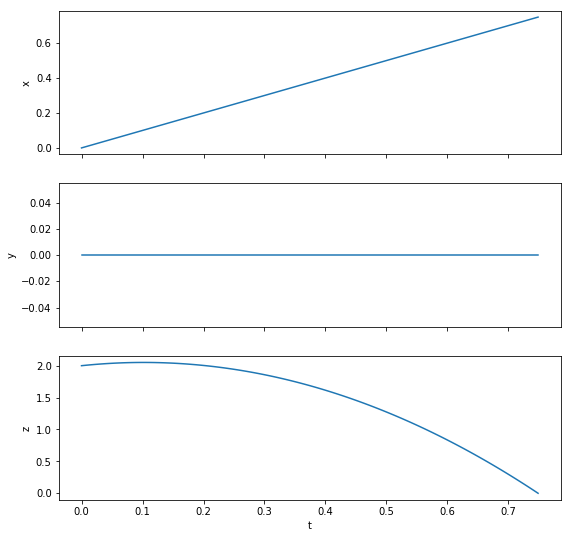

In [3]:
# Parâmetros:
h = 2
v_x0 = 1
v_y0 = 0
v_z0 = 1
g = 9.81

# Calcula uma trajetória
t, trajetoria = trajetoria_simples(h, (v_x0, v_y0, v_z0), g, 100)
# Extraimos as componentes  x, y e z para facilitar nos gráficos
x = trajetoria[:, 0]
y = trajetoria[:, 1]
z = trajetoria[:, 2]

# Plota x(t), y(t) e z(t)
fig, axarray = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(9, 9)
axarray[0].plot(t, x)
axarray[0].set_ylabel('x')
axarray[1].plot(t, y)
axarray[1].set_ylabel('y')
axarray[2].plot(t, z)
axarray[2].set_ylabel('z')
axarray[2].set_xlabel('t')
plt.show()

Mais interessante é plotar a trajetória no espaço tridimensional. Para isso, usamos o módulo `mplot3d`.

In [4]:
from mpl_toolkits.mplot3d import Axes3D

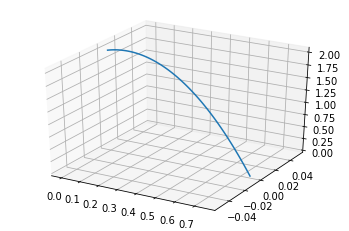

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z)
plt.show()

Neste caso, como a trajetória é bidimensional (restrita ao plano $y=0$) faz mais sentido plotar apenas o plano $x, z$.

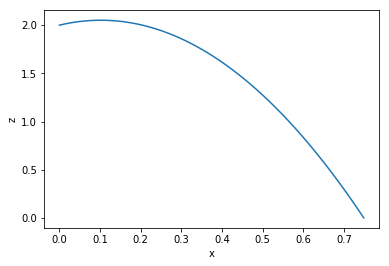

In [6]:
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

O próximo passo é simularmos o sistema representado pelas equações diferenciais para comparar o resultado com o analítico apresentado acima. Para isso, como sempre, precisamos converter o sistema de equações em um sistema de equações de primeiro grau, usando o truque tradicional de incluir variáveis para as velocidades. Assim, além das posições $x, y, z$, teremos também as velocidades $u, v, w$, respectivamente, e o conjunto de equações fica:

\begin{eqnarray}
\frac{dx}{dt} & = & u \\
\frac{dy}{dt} & = & v \\
\frac{dz}{dt} & = & w \\
\frac{du}{dt} & = & 0 \\
\frac{dv}{dt} & = & 0 \\
\frac{dw}{dt} & = & -g \\
\end{eqnarray}

E agora as condições iniciais são dadas por $(0, 0, h, v_{x,0}, 0, v_{z,0})$.

Com isso podemos usar o `odeint` do SciPy para resolver numericamente o sistema de equações.

In [6]:
from scipy.integrate import odeint

In [7]:
# Função que calcula as derivadas para o estado xyzuvw no instante t
def deriv_ideal(xyzuvw, t, g):
    x, y, z, u, v, w = xyzuvw
    return [u, v, w, 0, 0, -g]

In [8]:
# Usamos os mesmos parâmetros e o mesmo t anteriores
iniciais = [0, 0, h, v_x0, v_y0, v_z0]
xyzuvw_t = odeint(deriv_ideal, iniciais, t, args=(g,))
# Agora extraimos as componentes x, y e z (para faciliar o gráfico)
xs = xyzuvw_t[:, 0]
ys = xyzuvw_t[:, 1]
zs = xyzuvw_t[:, 2]

Agora podemos plotar as duas trajetórias simultaneamente para verificar se há diferença.

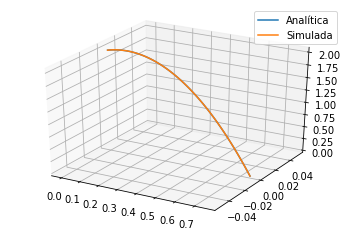

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='Analítica')
ax.plot(xs, ys, zs, label='Simulada')
ax.legend()
plt.show()

Ou no plano $(x, z)$:

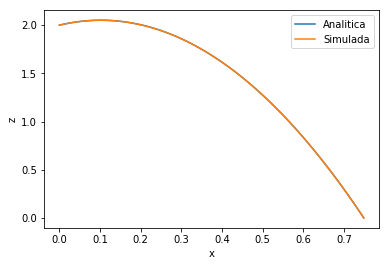

In [10]:
plt.plot(x, z, label='Analitica')
plt.plot(xs, zs, label='Simulada')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

Vemos que as duas trajetórias estão superpostas, como esperado.

Infelizmente, no código acima fizemos uma trapaça: Usamos o intervalo de tempo calculado considerando a solução analítica, **que não estaria disponível se precisássemos realizar simulações!**

Duas formas de lidar com esse problema são:
- Simular por um tempo suficientemente grande, depois descartar os valores em que $z<0$.
- Simular um passo por vez e terminar quando chegamos em $z\le 0$.

A primeira solução tem a vantagem de porder usar `odeint` e é viável quando temos razão para acreditar que sabemos uma boa aproximação inicial para $T$. Se não temos uma aproximação para $T$, então devemos usar a segunda solução, que infelizmente não pode fazer uso de `odeint`, mas precisamos usar um objeto da classe `ode` e realizar a integração passo a passo, como exemplificado no código abaixo.

In [11]:
# Função de derivadas para a classe ode.
# Note a inversão da ordem dos parâmetros t e xyzuvw em relação à outra derivada!
def deriv_ideal_2(t, xyzuvw, g): 
    x, y, z, u, v, w = xyzuvw
    return [u, v, w, 0, 0, -g]

Precisamos importar a classe `ode`.

In [12]:
from scipy.integrate import ode

In [15]:
# Especificamos o tempo inicial e o intervalo entre instantes sucessivos
t0 = 0
Δt = 0.01

# Criamos um objeto da classe ode associado à função correta de derivadas
r = ode(deriv_ideal_2)

# Ajustamos os dados do sistema simulado nesse objeto
r.set_initial_value(iniciais, t0) # Indica as condições inicias e instante inicial
r.set_f_params(g) # Passa parâmetro adicinonal da função de derivadas

# Agora fazemos a simulação
t2 = [t0] # Cria uma lista para guardar os instantes de tempo
xyzuvw_t2 = [iniciais] # Cria uma lista para guardar estados
last_z = h # Posição z onde o projétil está atualmente
while r.successful() and last_z > 0: # r.successful() verifica que a integração deu certo
    new_t = r.t + Δt # Calcula o proximo instante (r.t é o último calculado)
    t2.append(new_t) # Adiciona novo instante de tempo na lista
    new_xyzuvw = r.integrate(new_t) # Calcula novo estado
    xyzuvw_t2.append(new_xyzuvw) # Adiciona na lista de estados
    last_z = new_xyzuvw[2] # Verifica o valor de z atual
    
# Extraimos os componentes x, y e z
xyzuvw_t2 = np.array(xyzuvw_t2) # Converte para array para indexação
xs2 = xyzuvw_t2[:, 0]
ys2 = xyzuvw_t2[:, 1]
zs2 = xyzuvw_t2[:, 2]

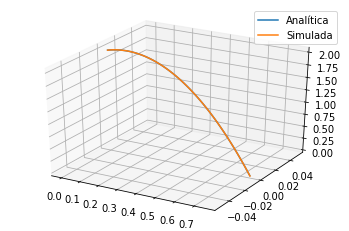

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='Analítica')
ax.plot(xs2, ys2, zs2, label='Simulada')
ax.legend()
plt.show()

Por curiosidade, vejamos se os dois sistemas estão sendo simulados no mesmo intervalo de tempo:

In [17]:
print('O valor de T é', t[-1])
print('O sistema foi simulado até', t2[-1])
print('A diferença é de', t2[-1] - t[-1])
print('Compare isso com o incremento de tempo escolhido de', Δt)

O valor de T é 0.7485729470806812
O sistema foi simulado até 0.7500000000000004
A diferença é de 0.001427052919319216
Compare isso com o incremento de tempo escolhido de 0.01


**Nota:** Todos os casos acima são estritamente bidimensionais, e poderiam ser simulados bidimensionalmente no plano $xz$. Entretanto, deixamos o caso geral para mostrar como lidar com ele tanto na simulação como nos gráficos.

# Execução do projeto: preliminares

Código que será útil em todos os casos abaixo. Também importo todas as bibliotecas novamente para que só seja necessário executar o notebook a partir daqui.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Calcula a magnitude da velocidade
def vel_abs(u,v,w): return np.sqrt(u*u+v*v+w*w)

# Integra o sistema 
# estado = func(t,estado,params)
# a partir de t0 a passos Δt, com parâmetros 'params' e estado inicial 'inicial',
# enquanto z for positivo. Retorna tupla de arrays (x,y,z,u,v,w) (trajetória).
def integrar_projetil(inicial,func,params,t0=0,Δt=0.01):
    r = ode(func)
    r.set_initial_value(inicial,t0)
    r.set_f_params(*params)
    
    # Código copiado com poucas modificações de um bloco acima:
    
    t2 = [t0] # Cria uma lista para guardar os instantes de tempo
    xyzuvw_t2 = [inicial] # Cria uma lista para guardar estados
    last_z = inicial[2] # Posição z onde o projétil está atualmente
    while r.successful() and last_z >= 0: # r.successful() verifica que a integração deu certo
        new_t = r.t + Δt # Calcula o proximo instante (r.t é o último calculado)
        t2.append(new_t) # Adiciona novo instante de tempo na lista
        new_xyzuvw = r.integrate(new_t) # Calcula novo estado
        xyzuvw_t2.append(new_xyzuvw) # Adiciona na lista de estados
        last_z = new_xyzuvw[2] # Verifica o valor de z atual
    
    # Retornar arrays x,y,z,u,v,w em função do tempo
    xyzuvw_t2 = np.array(xyzuvw_t2)
    return tuple([xyzuvw_t2[:,i] for i in range(6)])

# Calcula a coordenada u (= x ou y) em que o projétil toca o chão, por
# interpolação linear. Baseado no fato de que z[-1] é sempre <= 0, enquanto
# z[-2] é sempre positivo. Erro da ordem de vΔt².
def alcance_coord(u,z):
    return u[-2] - z[-2]*(u[-1]-u[-2])/(z[-1]-z[-2])

# Calcula a altura máxima com erro da ordem de vΔt².
def altura_max(z):
    return np.max(z)

# Recebe uma função de derivadas, uma lista (ou array) de condições
# iniciais, uma de parâmetros, e funções da trajetória para calcular.
# Integra para cada condição inicial e calcula as funções na trajetória
# obtida.
# Retorna uma tupla de arrays contendo os resultados das funções.
# Exemplo de funções da trajetória: alcance, altura máxima, ação,
# velocidade máxima.
def variar_condicoes(derivadas, iniciais, params, funcs, t0=0, Δt=0.01):
    if not funcs: return
    
    resultados = list(list() for f in funcs)
    for inicial in iniciais:
        x,y,z,u,v,w = integrar_projetil(inicial,derivadas,params,t0,Δt)
        for i,f in enumerate(funcs):
            resultados[i].append(f(x,y,z,u,v,w))
    
    # Converte os resultados para uma tupla de arrays
    for i in range(len(funcs)):
        resultados[i] = np.array(resultados[i])
    return tuple(resultados)

### Trajetória de uma bala de canhão: Resistência do ar

Vamos agora considerar a trajetória de uma bala de canhão. Como seu tamanho não é desprezível e sua velocidade é alta, o primeiro elemento a incluir é a resistência do ar. Considerando as altas velocidades envolvidas, o elemento quadrático da resistência do ar é dominante, e sua expressão é:

$$R = B v^2,$$

onde $R$ é o módulo da força de resistência do ar, $B$ é uma constante que depende do projétil e $v$ é o módulo da velocidade $v = \sqrt{v_x^2+v_y^2+v_z^2}$. Como a resistência do ar é contrária ao movimento, devemos projetar seus componentes em cada uma das direções de acordo com os componentes da velocidade em cada direção:

\begin{eqnarray}
R_x & = & - B v v_x\\
R_y & = & - B v v_y\\
R_z & = & - B v v_z
\end{eqnarray}

Adicione esses componentes nas equações e simule o sistema com os seguintes parâmetros:
- $B/m=4\cdot10^{-5}$
- A velocidade inicial tem sempre módulo $700m/s$, mas faz um ângulo $\theta$ em relação à horizontal.
- O projétil é lançado de $(0,0,0)$.

Simule para alguns valores de $\theta$, $0 < \theta < 90°$ e compare com o resultado analítico:
- Como o alcance do tiro (máxima coordenada $x$ da trajetória) é afetado pela resistência do ar?
- Como a máxima altitude do projétil é afetada pela resistência do ar?
- Calcule, com uma precisão de 1°, o ângulo para o qual o alcance é máximo. O alcance máximo acontece com um ângulo de 45°, como no caso ideal?

### Solução

Primeiro escrevemos a função de derivadas (assumindo $m=1$):

In [3]:
# Função de derivadas para o caso com resistência do ar
def deriv_resist_1(t, estado, g, B):
    x,y,z,u,v,w = estado
    vel = vel_abs(u,v,w)
    return [u,v,w, -B*vel*u, -B*vel*v, -B*vel*w -g]

Agora podemos simular a trajetória partindo da origem para diferentes ângulos de lançamento. Aqui, mostro trajetórias entre 10° e 80°:

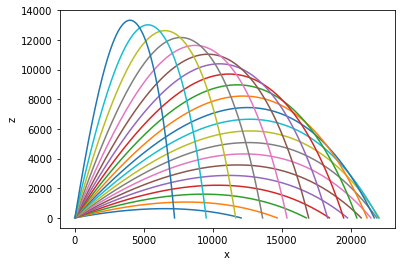

In [4]:
g = 9.81
B = 4e-5
v0 = 700

trajetorias = []
for θ in np.linspace(10,80,20+1):
    θ_rad = np.deg2rad(θ)
    inicial = 0,0,0, v0*np.cos(θ_rad),0,v0*np.sin(θ_rad)
    x,_,z,_,_,_ = integrar_projetil(inicial,deriv_resist_1,(g,B))
    trajetorias.append((x,z,r'$\theta = {}$'.format(θ)))
plot_xz(trajetorias,legend=False)

Para responder às duas primeiras perguntas, vamos calcular, para cada dada trajetória, a altura máxima e o alcance horizontal. Isto será comparado com os valores do caso ideal (sem resistência do ar), dados respectivamente por

$$ H_{max} = \frac{v_0^2 \sin^2 \theta}{2g},\;\;\; A = \frac{v_0^2 \sin 2 \theta}{g} $$

In [5]:
# Cálculo preciso do alcance máximo, variando θ de um décimo de grau por vez
θ_arr3839 = np.linspace(38,39,10+1)
iniciais = [[0, 0, 0, v0*np.cos(θ_rad), 0, v0*np.sin(θ_rad)]
            for θ_rad in np.deg2rad(θ_arr3839)]

alcance_arr1_prec, = variar_condicoes(deriv_resist_1,iniciais,(g,B),
                              (lambda x,y,z,u,v,w: alcance_coord(x,z),),
                               Δt = 0.001)

index_max = np.argmax(alcance_arr1_prec)

θ_alcance_max1, alcance_max1 = θ_arr3839[index_max], alcance_arr1_prec[index_max]

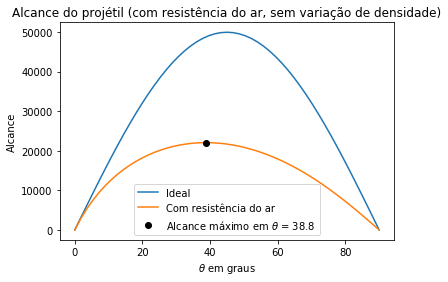

In [6]:
def alcance_ideal(θ,v0=v0,g=g): return v0**2*np.sin(2*np.deg2rad(θ))/g

# Cálculo do alcance para comparar com o ideal
θ_arr090 = np.linspace(0,90,50+1)
iniciais = [[0, 0, 0, v0*np.cos(θ_rad), 0, v0*np.sin(θ_rad)]
            for θ_rad in np.deg2rad(θ_arr090)]
alcance_arr1, = variar_condicoes(deriv_resist_1,iniciais,(g,B),
                              (lambda x,y,z,u,v,w: alcance_coord(x,z),))

plt.plot(θ_arr090, alcance_ideal(θ_arr090), label='Ideal')
plt.plot(θ_arr090, alcance_arr1, label='Com resistência do ar')
plt.plot([θ_alcance_max1], [alcance_max1],'ok',
         label=r'Alcance máximo em $\theta$ = %.1f'%θ_alcance_max1)
plt.xlabel(r'$\theta$ em graus')
plt.ylabel('Alcance')
plt.title('Alcance do projétil (com resistência do ar, sem variação de densidade)')
plt.legend()
plt.show()

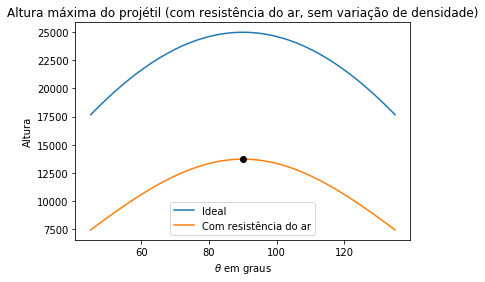

In [7]:
def altura_max_ideal(θ,v0=v0,g=g): return v0**2*np.sin(np.deg2rad(θ))/(2*g)

# Cálculo da altura máxima
θ_arr45135 = np.linspace(45,135,40+1)
iniciais = [[0, 0, 0, v0*np.cos(θ_rad), 0, v0*np.sin(θ_rad)]
            for θ_rad in np.deg2rad(θ_arr45135)]

altura_arr1, = variar_condicoes(deriv_resist_1,iniciais,(g,B),
                              (lambda x,y,z,u,v,w: altura_max(z),),
                               Δt = 0.005)

index_max = np.argmax(altura_arr1)
θ_altura_max1, altura_max_val1 = θ_arr45135[index_max], altura_arr1[index_max]

plt.plot(θ_arr45135, altura_max_ideal(θ_arr45135), label='Ideal')
plt.plot(θ_arr45135, altura_arr1, label='Com resistência do ar')
plt.plot([θ_altura_max1], [altura_max_val1],'ok')
plt.xlabel(r'$\theta$ em graus')
plt.ylabel('Altura')
plt.title('Altura máxima do projétil (com resistência do ar, sem variação de densidade)')
plt.legend()
plt.show()

Quando incluímos a resistência do ar, o alcance do projétil e a altura máxima atingida ambos diminuiram aproximadamente por um fator de 2. Além disso, o alcance máximo não é mais obtido em 45°, como no caso ideal, embora a altura máxima ainda seja a do lançamento puramente vertical ($\theta$ = 90°). Os resultados são resumidos abaixo.

In [8]:
print('Caso com resistência do ar, sem variação de densidade:')
print('Alcance máximo em %.1f° de %.1f metros'%(θ_alcance_max1,alcance_max1))
print('Altura máxima em %.1f° de %.1f metros'%(θ_altura_max1,altura_max_val1))

alcance_ideal_max = alcance_ideal(45)
altura_max_ideal_max = altura_max_ideal(90)

print('\nCaso ideal:')
print('Alcance máximo em 45° de %.1f metros'%alcance_ideal_max)
print('Altura máxima em 90° de %.1f metros'%altura_max_ideal_max)

Caso com resistência do ar, sem variação de densidade:
Alcance máximo em 38.8° de 22057.6 metros
Altura máxima em 90.0° de 13724.2 metros

Caso ideal:
Alcance máximo em 45° de 49949.0 metros
Altura máxima em 90° de 24974.5 metros


### Trajetória de uma bala de canhão: Variação da densidade do ar

Você deve ter notado que o projétil chega a grandes altitudes antes de cair novamente no solo. Isso significa que existe a possibilidade de que variações na densidade do ar tenham efeitos importantes, principalmente considerando que o coeficiente $B$ depende da densidade do ar.

Para considerar isso, usaremos a aproximação adiabática para a densidade do ar (livro de Giordano e Nakanishi):

$$\rho = \rho_0 \left( 1 - \frac{a z}{T_0}\right)^\alpha,$$

onde $a \approx 6.5\cdot10^{-3}K/m$, $T_0$ é a temperatura ao nível do mar (em Kelvin), que faremos igual a 296.15, $\alpha\approx 2.5$ e $\rho_0$ é a densidade a nivel do mar (que é o nosso $z=0$). A resistência do ar é proporcional à densidade do ar, portanto para levar esse efeito em consideração basta substituirmos o módulo da resistência por:

$$\hat{R} = \frac{\rho}{\rho_0}R = \left( 1 - \frac{a z}{T_0}\right)^\alpha B v^2$$.

Faça as alterações necessárias nas equações, simule o sistema e compare os resultados tanto com o modelo sem variação de densidade do ar quanto com o modelo sem resistência do ar.

### Solução

A implementação é idêntica à do problema anterior, exceto por uma mudança na função de derivadas:

In [9]:
a = 6.5e-3
α = 2.5
T0 = 296.15
def correcao_densidade(z):
    return (1-a*z/T0)**α

# Função de derivadas para o caso com resistência do ar e variação de densidade
def deriv_resist_2(t, estado, g, B):
    x,y,z,u,v,w = estado
    vel = vel_abs(u,v,w)
    return [u,v,w,
            -correcao_densidade(z)*B*vel*u,
            -correcao_densidade(z)*B*vel*v, 
            -correcao_densidade(z)*B*vel*w - g]

Vejamos as trajetórias:

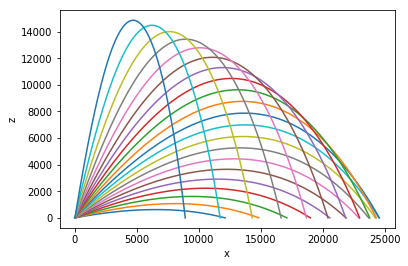

In [10]:
g = 9.81
B = 4e-5
v0 = 700

trajetorias = []
for θ in np.linspace(10,80,20+1):
    θ_rad = np.deg2rad(θ)
    inicial = 0,0,0, v0*np.cos(θ_rad),0,v0*np.sin(θ_rad)
    x,_,z,_,_,_ = integrar_projetil(inicial,deriv_resist_2,(g,B))
    trajetorias.append((x,z,r'$\theta = {}$'.format(θ)))
plot_xz(trajetorias,legend=False)

Em comparação com as trajetórias do problema anterior, estas são mais altas e o alcance é maior.

In [11]:
# Cálculo preciso do alcance máximo, variando θ de um décimo de grau por vez
θ_arr4344 = np.linspace(43,44,10+1)
iniciais = [[0, 0, 0, v0*np.cos(θ_rad), 0, v0*np.sin(θ_rad)]
            for θ_rad in np.deg2rad(θ_arr4344)]

alcance_arr2_prec, = variar_condicoes(deriv_resist_2,iniciais,(g,B),
                              (lambda x,y,z,u,v,w: alcance_coord(x,z),),
                               Δt = 0.001)

index_max = np.argmax(alcance_arr2_prec)

θ_alcance_max2, alcance_max2 = θ_arr4344[index_max], alcance_arr2_prec[index_max]

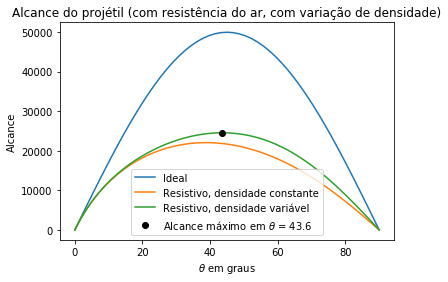

In [12]:
# Cálculo do alcance para comparação gráfica
θ_arr090 = np.linspace(0,90,50+1)
iniciais = [[0, 0, 0, v0*np.cos(θ_rad), 0, v0*np.sin(θ_rad)]
            for θ_rad in np.deg2rad(θ_arr090)]
alcance_arr2, = variar_condicoes(deriv_resist_2,iniciais,(g,B),
                              (lambda x,y,z,u,v,w: alcance_coord(x,z),))

plt.plot(θ_arr090, alcance_ideal(θ_arr090), label='Ideal')
plt.plot(θ_arr090, alcance_arr1, label='Resistivo, densidade constante')
plt.plot(θ_arr090, alcance_arr2, label='Resistivo, densidade variável')
plt.plot([θ_alcance_max2], [alcance_max2],'ok',
         label=r'Alcance máximo em $\theta$ = %.1f'%θ_alcance_max2)
plt.xlabel(r'$\theta$ em graus')
plt.ylabel('Alcance')
plt.title('Alcance do projétil (com resistência do ar, com variação de densidade)')
plt.legend()
plt.show()

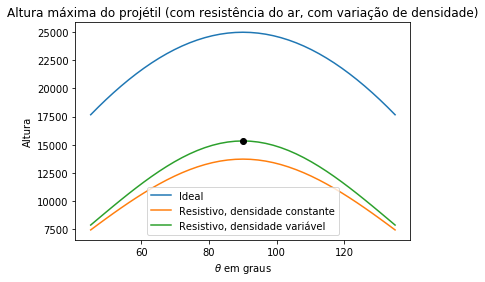

In [13]:
# Cálculo da altura máxima
θ_arr45135 = np.linspace(45,135,40+1)
iniciais = [[0, 0, 0, v0*np.cos(θ_rad), 0, v0*np.sin(θ_rad)]
            for θ_rad in np.deg2rad(θ_arr45135)]

altura_arr2, = variar_condicoes(deriv_resist_2,iniciais,(g,B),
                              (lambda x,y,z,u,v,w: altura_max(z),),
                               Δt = 0.005)

index_max = np.argmax(altura_arr2)
θ_altura_max2, altura_max_val2 = θ_arr45135[index_max], altura_arr2[index_max]

plt.plot(θ_arr45135, altura_max_ideal(θ_arr45135), label='Ideal')
plt.plot(θ_arr45135, altura_arr1, label='Resistivo, densidade constante')
plt.plot(θ_arr45135, altura_arr2, label='Resistivo, densidade variável')
plt.plot([θ_altura_max2], [altura_max_val2],'ok')
plt.xlabel(r'$\theta$ em graus')
plt.ylabel('Altura')
plt.title('Altura máxima do projétil (com resistência do ar, com variação de densidade)')
plt.legend()
plt.show()

Nota-se que no gráfico da altura máxima que a inclusão da variação de densidade faz mais diferença para lançamentos mais verticais ($\theta \approx$ 90°), o que era esperado: estes atingem camadas mais altas da atmosfera, onde a densidade do ar é menor, e assim enfrentam menos resistência para subir.

Em comparação com o caso em que a densidade do ar é constante, este se aproximou mais do ideal: o ângulo ótimo de lançamento (para maximizar o alcance) é mais próximo de 45°, e tanto altura máxima quanto alcance são maiores, embora continuem distantes daquelas do caso ideal. Os resultados se resumem abaixo.

In [14]:
print('Caso com resistência do ar, com variação de densidade:')
print('Alcance máximo em %.1f° de %.1f metros'%(θ_alcance_max2,alcance_max2))
print('Altura máxima em %.1f° de %.1f metros'%(θ_altura_max2,altura_max_val2))

print('\nCaso com resistência do ar, sem variação de densidade:')
print('Alcance máximo em %.1f° de %.1f metros'%(θ_alcance_max1,alcance_max1))
print('Altura máxima em %.1f° de %.1f metros'%(θ_altura_max1,altura_max_val1))

alcance_ideal_max = alcance_ideal(45)
altura_max_ideal_max = altura_max_ideal(90)
print('\nCaso ideal:')
print('Alcance máximo em 45° de %.1f metros'%alcance_ideal_max)
print('Altura máxima em 90° de %.1f metros'%altura_max_ideal_max)

Caso com resistência do ar, com variação de densidade:
Alcance máximo em 43.6° de 24542.1 metros
Altura máxima em 90.0° de 15335.5 metros

Caso com resistência do ar, sem variação de densidade:
Alcance máximo em 38.8° de 22057.6 metros
Altura máxima em 90.0° de 13724.2 metros

Caso ideal:
Alcance máximo em 45° de 49949.0 metros
Altura máxima em 90° de 24974.5 metros


### Trajetória de uma bola de baseball

No livro de Giordano e Nakanishi, seção 2.3, existe uma discussão onde se mostra que o coeficiente de resistência do ar não é constante, mas depende da velocidade da bola, o que é importante considerando as velocidades típicas de bolas de baseball. Usaremos a expressão experimental da equação 2.6 desse livro, reproduzida abaixo, para calcular a trajetória da bola de baseball.

$$ \frac{B}{m} = 0.0039 + \frac{0.0058}{1 + \exp \left[(v - v_d)/\Delta\right]},$$

onde $v$ é o módulo da velocidade da bola, $v_d=35m/s$, $\Delta = 5m/s$ e tudo está em unidade SI.

Reescreva as equações para levar em conta esse efeito. Além disso:
- Despreze variações de densidade (pois a bola nunca sobe muito).
- Considere que a bola é lançada de $(0,0,1)$ com velocidade de $50 m/s$ e ângulo $\theta=35°$.
- Compare o resultado com o movimento no vácuo e com o movimento no ar mas desprezando a variação de $B/m$ (isto é, use o valor de $B/m$ para $v=0$).

### Solução

Como no caso anterior, basta introduzir um fator de correção:

In [15]:
Δ = 5
vd = 35
def B_corrigido(vel):
    return 0.0039 + 0.0058/(1 + np.exp((vel-vd)/Δ))

# Função de derivadas para o caso com resistência do ar e variação de densidade
def deriv_resist_3(t, estado, g, ignorar_correcao=False):
    x,y,z,u,v,w = estado
    vel = vel_abs(u,v,w)
    B = B_corrigido(0) if ignorar_correcao else B_corrigido(vel)
    return [u,v,w,
            -B*vel*u,
            -B*vel*v, 
            -B*vel*w - g]

Agora simulamos as três situações diferentes com mesmas condições iniciais. A trajetória no vácuo pode ser calculada pela primeira função de derivadas se pusermos $B=0$:

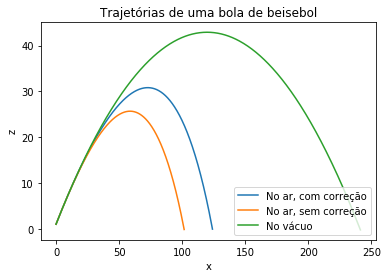

In [16]:
θ3 = 35
θ_rad3 = np.deg2rad(θ3)
inicial3 = [0,0,1, 50*np.cos(θ_rad3), 0, 50*np.sin(θ_rad3)]

x_arc3,_,z_arc3,_,_,_ = integrar_projetil(inicial3,deriv_resist_3,(g,))
x_ars3,_,z_ars3,_,_,_ = integrar_projetil(inicial3,deriv_resist_3,(g,True))
x_vac3,_,z_vac3,_,_,_ = integrar_projetil(inicial3,deriv_resist_1,(g,0))

plt.plot(x_arc3,z_arc3,label='No ar, com correção')
plt.plot(x_ars3,z_ars3,label='No ar, sem correção')
plt.plot(x_vac3,z_vac3,label='No vácuo')

plt.title('Trajetórias de uma bola de beisebol')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

O coeficiente de resistência do ar _variável_ permite que a bola vá mais longe que no caso em que ele é constante. Podemos plotar os pontos em que a bola toca o chão (plano xy) em cada caso:

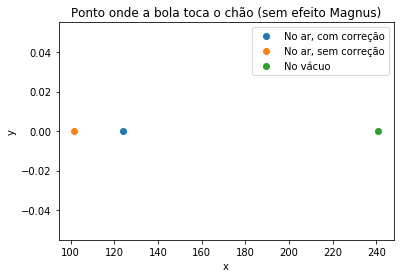

In [17]:
alcance_arc3 = alcance_coord(x_arc3,z_arc3)
alcance_ars3 = alcance_coord(x_ars3,z_ars3)
alcance_vac3 = alcance_coord(x_vac3,z_vac3)

plt.plot([alcance_arc3],[0],'o',label='No ar, com correção')
plt.plot([alcance_ars3],[0],'o',label='No ar, sem correção')
plt.plot([alcance_vac3],[0],'o',label='No vácuo')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Ponto onde a bola toca o chão (sem efeito Magnus)')
plt.legend()
plt.show()

Resumindo os resultados:

In [18]:
altura_max_arc3 = altura_max(z_arc3)
altura_max_ars3 = altura_max(z_ars3)
altura_max_vac3 = altura_max(z_vac3)

print('Caso com resistência do ar, com correção:')
print('Alcance de %.1f metros'%(alcance_arc3))
print('Altura máxima de %.1f metros'%(altura_max_arc3))

print('\nCaso com resistência do ar, sem correção:')
print('Alcance de %.1f metros'%(alcance_ars3))
print('Altura máxima de %.1f metros'%(altura_max_ars3))

print('\nCaso ideal:')
print('Alcance de %.1f metros'%(alcance_vac3))
print('Altura máxima de %.1f metros'%(altura_max_vac3))

Caso com resistência do ar, com correção:
Alcance de 123.9 metros
Altura máxima de 30.8 metros

Caso com resistência do ar, sem correção:
Alcance de 101.4 metros
Altura máxima de 25.7 metros

Caso ideal:
Alcance de 240.9 metros
Altura máxima de 42.9 metros


### Spin na bola de baseball

Por fim, vamos incluir também o efeito de spin. Quando a bola roda, além de ter uma velocidade inicial, a rotação tem uma influência na trajetória, devido ao conhecido efeito Magnus.

Como argumentado no livro de Giordano e Nakanishi, a força de Magnus pode ser escrita como:

$$ \mathbf{M} = S_0 \mathbf{\omega}\times\mathbf{v},$$

onde $\mathbf{M}$ é o vetor da força de Magnus, $\mathbf{\omega}$ é o vetor da rotação, $\mathbf{v}$ é o vetor de velocidade e $\times$ indica produto vetorial.

Inclua esse fator no cálculo da trajetória da bola de baseball:
- Use $S_0/m\approx 4.1\cdot10^{-4}.$
- considere posição e velocidades iniciais como no caso anterior, $B/m$ variável com $v$.
- Conside que o módulo da velocidade de rotação é $|\omega|=30$ (rotações por segundo).
- Analise os seguintes casos:
  - $\mathbf{\omega}$ é na direção $y$ positiva.
  - $\mathbf{\omega}$ é na direção $y$ negativa.
  - $\mathbf{\omega}$ é na direção $z$ positiva.
  - $\mathbf{\omega}$ é na direção $z$ negativa.
  
O que acontece com a trajetória em cada caso? Como elas se compara com as trajetórias sem rotação?

### Solução

Se a rotação fosse dinâmica, a variável `estado` receberia mais 6 componentes (ângulos e velocidades angulares). Como consideramos a velocidade de rotação constante, simplificamos a integração, pois ela pode ser incluída como parâmetro da função de derivadas:

In [19]:
# Função de derivadas para o caso com resistência do ar, variação de densidade e efeito Magnus
def deriv_resist_4(t, estado, g, ωx, ωy, ωz, S0=4.1e-4):
    x,y,z,u,v,w = estado
    vel = vel_abs(u,v,w)
    B = B_corrigido(vel)
    return [u,v,w,
            -B*vel*u + S0*(ωy*w - ωz*v),
            -B*vel*v + S0*(ωz*u - ωx*w), 
            -B*vel*w + S0*(ωx*v - ωy*u) - g]

Agora basta integrar e graficar as trajetórias sem rotação (`004`), com rotação em torno de y (`yp4`,`yn4`) e com rotação em torno de z (`zp4`,`zn4`):

In [20]:
# Integra os diferentes casos com as mesmas posição e velocidade iniciais do problema anterior
ω0 = 30 * 2*np.pi # 30 revoluções por segundo, em rad/s
inicial4 = inicial3.copy()
x_004, y_004, z_004, _,_,_ = integrar_projetil(inicial4, deriv_resist_4, (g,0,0,0))
x_yp4, y_yp4, z_yp4, _,_,_ = integrar_projetil(inicial4, deriv_resist_4, (g,0,ω0,0))
x_yn4, y_yn4, z_yn4, _,_,_ = integrar_projetil(inicial4, deriv_resist_4, (g,0,-ω0,0))
x_zp4, y_zp4, z_zp4, _,_,_ = integrar_projetil(inicial4, deriv_resist_4, (g,0,0,ω0))
x_zn4, y_zn4, z_zn4, _,_,_ = integrar_projetil(inicial4, deriv_resist_4, (g,0,0,-ω0))

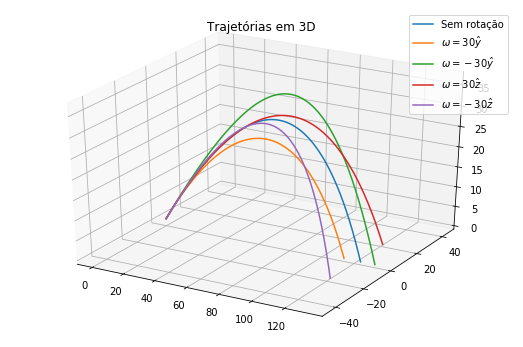

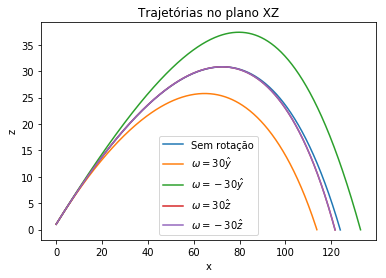

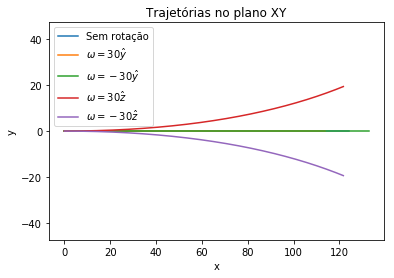

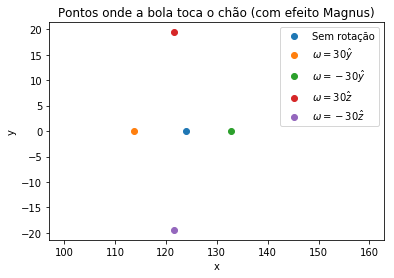

In [22]:
l004 = 'Sem rotação'
lyp4 = r'$\omega = 30\hat{y}$'
lyn4 = r'$\omega = -30\hat{y}$'
lzp4 = r'$\omega = 30\hat{z}$'
lzn4 = r'$\omega = -30\hat{z}$'

# Grafica as trajetórias em 3D
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
ax.plot(x_004, y_004, z_004, label=l004)
ax.plot(x_yp4, y_yp4, z_yp4, label=lyp4)
ax.plot(x_yn4, y_yn4, z_yn4, label=lyn4)
ax.plot(x_zp4, y_zp4, z_zp4, label=lzp4)
ax.plot(x_zn4, y_zn4, z_zn4, label=lzn4)
ax.axis('equal')
ax.set_title('Trajetórias em 3D')
ax.legend()
plt.show()

# Grafica as trajetórias projetadas no plano xz
plt.plot(x_004,z_004,label=l004)
plt.plot(x_yp4,z_yp4,label=lyp4)
plt.plot(x_yn4,z_yn4,label=lyn4)
plt.plot(x_zp4,z_zp4,label=lzp4)
plt.plot(x_zn4,z_zn4,label=lzn4)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Trajetórias no plano XZ')
plt.legend()
plt.show()

# Grafica as trajetórias projetadas no plano xy
plt.plot(x_004,y_004,label=l004)
plt.plot(x_yp4,y_yp4,label=lyp4)
plt.plot(x_yn4,y_yn4,label=lyn4)
plt.plot(x_zp4,y_zp4,label=lzp4)
plt.plot(x_zn4,y_zn4,label=lzn4)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('Trajetórias no plano XY')
plt.legend()
plt.show()

# Grafica os pontos onde a bola toca o chão em cada caso
alcancex_004, alcancey_004 = alcance_coord(x_004,z_004), alcance_coord(y_004,z_004)
alcancex_yp4, alcancey_yp4 = alcance_coord(x_yp4,z_yp4), alcance_coord(y_yp4,z_yp4)
alcancex_yn4, alcancey_yn4 = alcance_coord(x_yn4,z_yn4), alcance_coord(y_yn4,z_yn4)
alcancex_zp4, alcancey_zp4 = alcance_coord(x_zp4,z_zp4), alcance_coord(y_zp4,z_zp4)
alcancex_zn4, alcancey_zn4 = alcance_coord(x_zn4,z_zn4), alcance_coord(y_zn4,z_zn4)
plt.plot([alcancex_004],[alcancey_004],'o',label=l004)
plt.plot([alcancex_yp4],[alcancey_yp4],'o',label=lyp4)
plt.plot([alcancex_yn4],[alcancey_yn4],'o',label=lyn4)
plt.plot([alcancex_zp4],[alcancey_zp4],'o',label=lzp4)
plt.plot([alcancex_zn4],[alcancey_zn4],'o',label=lzn4)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.xlim(100,160)
plt.title('Pontos onde a bola toca o chão (com efeito Magnus)')
plt.legend()
plt.show()

Vemos que o efeito Magnus altera significativamente a trajetória da bola. Nos casos em que a velocidade angular é paralela ao eixo y, a força de Magnus fica no plano xz e a bola apenas desce ou sobe mais rápido. Nos casos em que a rotação é em torno do eixo z, a bola recebe uma força lateral e sai do plano xz, no sentido do lado que tem maior velocidade instantânea (devida à composição dos movimentos de translação e rotação).